In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets,transforms, models
import torch.nn.functional as F
%matplotlib inline

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [0]:
!ls

ants_and_bees  sample_data


In [0]:
!ls ants_and_bees/

train  val


In [0]:
!ls ants_and_bees/train

ants  bees


In [0]:
!ls ants_and_bees/train/ants

 0013035.jpg		     408393566_b5b694119b.jpg
 1030023514_aad5c608f9.jpg   424119020_6d57481dab.jpg
 1095476100_3906d8afde.jpg   424873399_47658a91fb.jpg
 1099452230_d1949d3250.jpg   450057712_771b3bfc91.jpg
 116570827_e9c126745d.jpg    45472593_bfd624f8dc.jpg
 1225872729_6f0856588f.jpg   459694881_ac657d3187.jpg
 1262877379_64fcada201.jpg   460372577_f2f6a8c9fc.jpg
 1269756697_0bce92cdab.jpg   460874319_0a45ab4d05.jpg
 1286984635_5119e80de1.jpg   466430434_4000737de9.jpg
 132478121_2a430adea2.jpg    470127037_513711fd21.jpg
 1360291657_dc248c5eea.jpg   474806473_ca6caab245.jpg
 1368913450_e146e2fb6d.jpg   475961153_b8c13fd405.jpg
 1473187633_63ccaacea6.jpg   484293231_e53cfc0c89.jpg
 148715752_302c84f5a4.jpg    49375974_e28ba6f17e.jpg
 1489674356_09d48dde0a.jpg   506249802_207cd979b4.jpg
 149244013_c529578289.jpg    506249836_717b73f540.jpg
 150801003_3390b73135.jpg    512164029_c0a66b8498.jpg
 150801171_cd86f17ed8.jpg    512863248_43c8ce579b.jpg
 154124431_65460430f2.jpg    518773929_7

In [0]:
train_transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.ColorJitter(contrast=0.8,brightness=0.8,saturation =0.8),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])


transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])
training_data = datasets.ImageFolder('ants_and_bees/train',transform=train_transform)
train_loader = torch.utils.data.DataLoader(dataset=training_data,batch_size=20,shuffle=True)
validation_data = datasets.ImageFolder('ants_and_bees/val',transform=transform)

validation_loader = torch.utils.data.DataLoader(dataset = validation_data,shuffle=False,batch_size=20)

In [0]:
print(len(training_data))
print(len(validation_data))

244
153


In [0]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1,2,0)
    image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    image = image.clip(0,1)
    return image

In [0]:
classes = ('Ants', 'Bees')

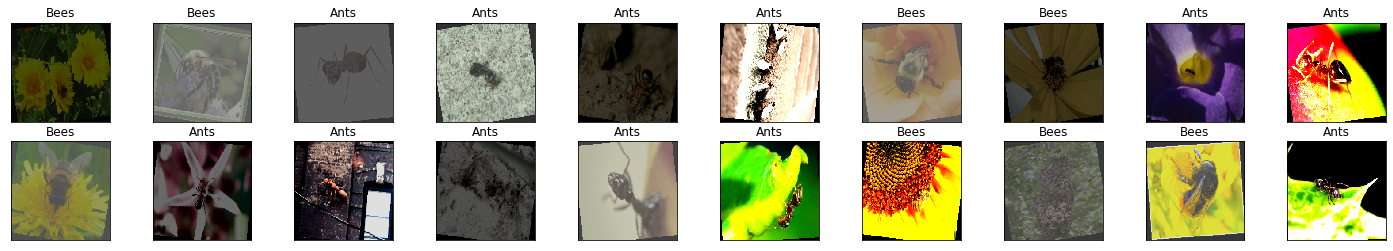

In [0]:
data_iter = iter(train_loader)
images, labels = data_iter.next()
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,10,idx+1,xticks = [],yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(classes[labels[idx].item()])

In [0]:
model = models.vgg16(pretrained=True)

In [0]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
for param in model.features.parameters():
  param.requires_grad = False


In [0]:
n_inputs = model.classifier[6].in_features
last_layer =nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer

In [0]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)


In [0]:
epochs = 6
running_loss_hist = []
running_correct_hist=[]
val_correct_hist=[]
val_loss_hist = []
for i in range(epochs):
    run_loss = 0.0
    run_corr = 0.0
    val_run_loss = 0.0
    val_run_corr = 0.0
    
    for inputs,labels in train_loader:
        inputs  = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criteria(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _,pred = torch.max(outputs,1)
        run_loss += loss.item()
        run_corr += torch.sum(pred==labels)
    
    else:
        with torch.no_grad():
            for val_inputs,val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criteria(val_outputs,val_labels)
                
                _,val_pred = torch.max(val_outputs,1)
                val_run_loss += val_loss.item()
                val_run_corr += torch.sum(val_pred == val_labels)
                
        epoch_val_loss = val_run_loss/len(validation_loader.dataset)
        epoch_val_corr = val_run_corr.float()/len(validation_loader.dataset)
        epoch_loss = run_loss/len(train_loader.dataset)
        epoch_corr = run_corr.float()/len(train_loader.dataset)
        running_loss_hist.append(epoch_loss)
        running_correct_hist.append(epoch_corr)
        val_correct_hist.append(epoch_val_corr)
        val_loss_hist.append(epoch_val_loss)
        print('Epoch : ',i+1)
        print("Training Loss : {:.4f} , Correct : {:.4f}".format(epoch_loss,epoch_corr.item()))
        print("Validation Loss : {:.4f} , Correct : {:.4f}".format(epoch_val_loss,epoch_val_corr.item()))
        


Epoch :  1
Training Loss : 0.0225 , Correct : 0.7869
Validation Loss : 0.0159 , Correct : 0.8693
Epoch :  2
Training Loss : 0.0122 , Correct : 0.8730
Validation Loss : 0.0139 , Correct : 0.9085
Epoch :  3
Training Loss : 0.0088 , Correct : 0.9262
Validation Loss : 0.0140 , Correct : 0.9216
Epoch :  4
Training Loss : 0.0102 , Correct : 0.9139
Validation Loss : 0.0150 , Correct : 0.9150
Epoch :  5
Training Loss : 0.0055 , Correct : 0.9590
Validation Loss : 0.0192 , Correct : 0.9020
Epoch :  6
Training Loss : 0.0040 , Correct : 0.9672
Validation Loss : 0.0156 , Correct : 0.9281


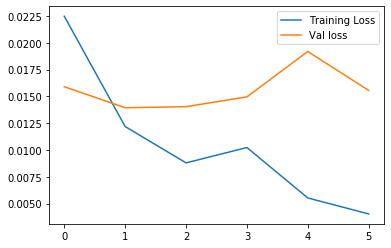

In [0]:
plt.plot(running_loss_hist,label='Training Loss')
plt.plot(val_loss_hist,label = 'Val loss')
plt.legend()

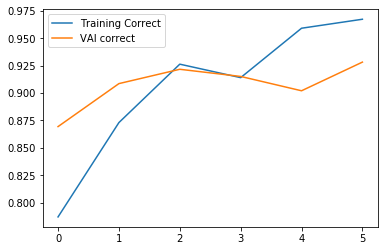

In [0]:
plt.plot(running_correct_hist,label='Training Correct')
plt.plot(val_correct_hist,label = 'VAl correct')
plt.legend()

In [0]:
import requests
import PIL.ImageOps
from PIL import Image

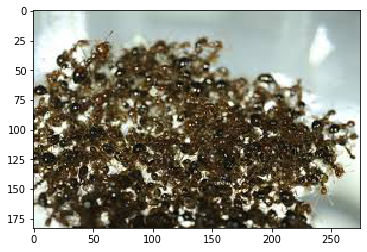

In [0]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZDCzyqsEK757VHn7jEkf9y8OyTXYlCxdIwFHN-FXTttNVsHE6&s'
response = requests.get(url,stream = True)
img = Image.open(response.raw)
plt.imshow(img)


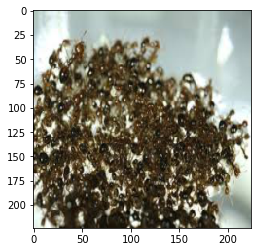

In [0]:
img = transform(img)
plt.imshow(im_convert(img))

In [0]:
img.shape

torch.Size([3, 224, 224])

In [0]:
img = img.to(device)
img = img.unsqueeze(0)
output = model(img)
_,pred = torch.max(output,1)
print(classes[pred.item()])

Ants


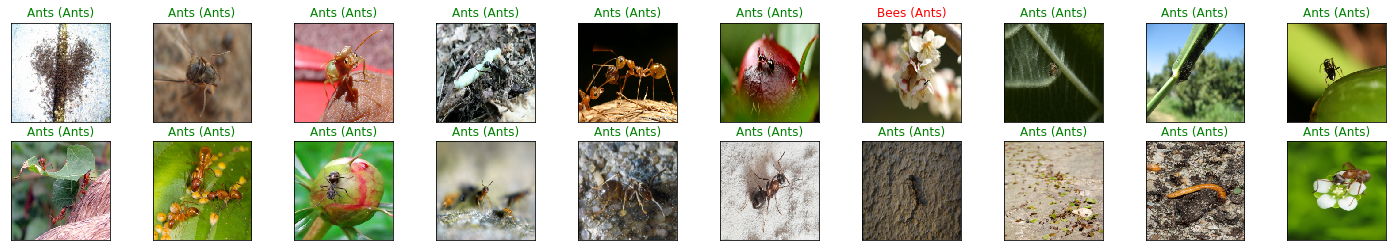

In [0]:
data_iter = iter(validation_loader)
images, labels = data_iter.next()
images = images.to(device)
labels = labels.to(device)

output = model(images)
_,preds = torch.max(output,1)

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

Now With AlexNet

In [0]:
model = models.alexnet(pretrained = True)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [0]:
for param in model.features.parameters():
  param.requires_grad_(False)

In [0]:
n_inputs = model.classifier[6].in_features
print(n_inputs)

4096


In [0]:
last_layer = nn.Linear(n_inputs,2)
model.classifier[6] = last_layer
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [0]:
model = model.to(device)

In [0]:
criteria_alex = nn.CrossEntropyLoss()
optimizer_alex = torch.optim.Adam(model.parameters(),lr=0.0001)

In [0]:
epochs = 6
running_loss_hist = []
running_correct_hist=[]
val_correct_hist=[]
val_loss_hist = []
for i in range(epochs):
    run_loss = 0.0
    run_corr = 0.0
    val_run_loss = 0.0
    val_run_corr = 0.0
    
    for inputs,labels in train_loader:
        inputs  = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criteria_alex(outputs,labels)
        optimizer_alex.zero_grad()
        loss.backward()
        optimizer_alex.step()
        
        _,pred = torch.max(outputs,1)
        run_loss += loss.item()
        run_corr += torch.sum(pred==labels)
    
    else:
        with torch.no_grad():
            for val_inputs,val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criteria_alex(val_outputs,val_labels)
                
                _,val_pred = torch.max(val_outputs,1)
                val_run_loss += val_loss.item()
                val_run_corr += torch.sum(val_pred == val_labels)
                
        epoch_val_loss = val_run_loss/len(validation_loader.dataset)
        epoch_val_corr = val_run_corr.float()/len(validation_loader.dataset)
        epoch_loss = run_loss/len(train_loader.dataset)
        epoch_corr = run_corr.float()/len(train_loader.dataset)
        running_loss_hist.append(epoch_loss)
        running_correct_hist.append(epoch_corr)
        val_correct_hist.append(epoch_val_corr)
        val_loss_hist.append(epoch_val_loss)
        print('Epoch : ',i+1)
        print("Training Loss : {:.4f} , Correct : {:.4f}".format(epoch_loss,epoch_corr.item()))
        print("Validation Loss : {:.4f} , Correct : {:.4f}".format(epoch_val_loss,epoch_val_corr.item()))
        


Epoch :  1
Training Loss : 0.0365 , Correct : 0.6516
Validation Loss : 0.0197 , Correct : 0.8170
Epoch :  2
Training Loss : 0.0205 , Correct : 0.8197
Validation Loss : 0.0209 , Correct : 0.8301
Epoch :  3
Training Loss : 0.0178 , Correct : 0.8361
Validation Loss : 0.0191 , Correct : 0.8693
Epoch :  4
Training Loss : 0.0155 , Correct : 0.8648
Validation Loss : 0.0187 , Correct : 0.8889
Epoch :  5
Training Loss : 0.0148 , Correct : 0.8852
Validation Loss : 0.0214 , Correct : 0.8497
Epoch :  6
Training Loss : 0.0116 , Correct : 0.9180
Validation Loss : 0.0196 , Correct : 0.8693


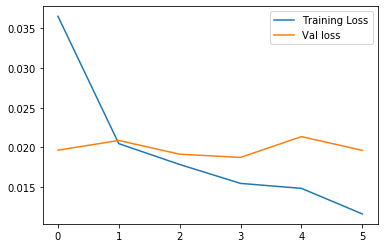

In [0]:
plt.plot(running_loss_hist,label='Training Loss')
plt.plot(val_loss_hist,label = 'Val loss')
plt.legend()

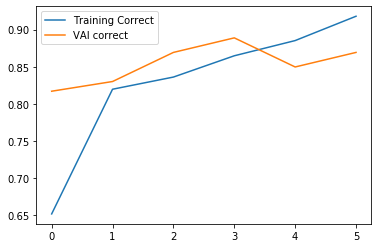

In [0]:
plt.plot(running_correct_hist,label='Training Correct')
plt.plot(val_correct_hist,label = 'VAl correct')
plt.legend()

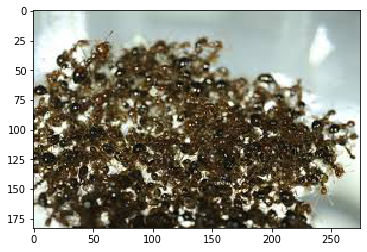

In [0]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZDCzyqsEK757VHn7jEkf9y8OyTXYlCxdIwFHN-FXTttNVsHE6&s'
response = requests.get(url,stream = True)
img = Image.open(response.raw)
plt.imshow(img)

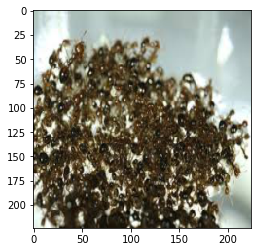

In [0]:
img = transform(img)
plt.imshow(im_convert(img))

In [0]:
img = img.to(device)
img = img.unsqueeze(0)
output = model(img)
_,pred = torch.max(output,1)
print(classes[pred.item()])

Ants


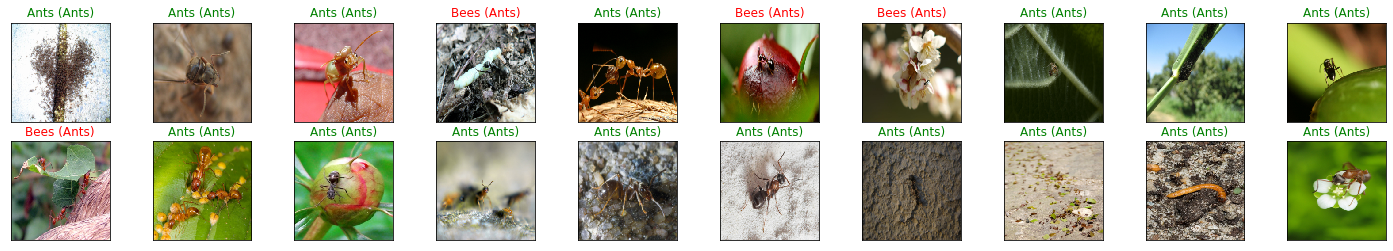

In [0]:
data_iter = iter(validation_loader)
images, labels = data_iter.next()
images = images.to(device)
labels = labels.to(device)

output = model(images)
_,preds = torch.max(output,1)

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))